<a href="https://colab.research.google.com/github/KW-ML/ML_Project/blob/main/code/RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,189 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import math
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rc('font', family='NanumBarunGothic')






In [ ]:
#train, test구축
data = pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/바이너리인코딩.csv", encoding = 'utf-8-sig')
data.drop(['Unnamed: 0','방류 BOD','유입 BOD'], axis = 1, inplace = True)
data = data.reset_index(drop=True)
data_idx = data[data['처리효율']==0].index

data = data.drop(data_idx)
data = data.reset_index(drop=True)
data

X = data[data.columns.difference(["처리효율"])]
Y = data["처리효율"]


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42) # 학습데이터와 평가데이터의 비율을 8:2 로 분할|(42 = 동일 분포로 계속) 
X_train, X_cv, Y_train, Y_cv = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 42) # 학습데이터와 평가데이터의 비율을 8:2 로 분할|(42 = 동일 분포로 계속) 

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
Y_train = Y_train.reset_index(drop=True)
Y_test = Y_test.reset_index(drop=True)
X_cv = X_cv.reset_index(drop=True)
Y_cv = Y_cv.reset_index(drop=True)

X_train.to_csv("/content/drive/MyDrive/기계학습팀플/코드/data/X_train.csv", encoding = 'utf-8-sig', index = False)
X_cv.to_csv("/content/drive/MyDrive/기계학습팀플/코드/data/X_cv.csv", encoding = 'utf-8-sig', index = False)
Y_train.to_csv("/content/drive/MyDrive/기계학습팀플/코드/data/Y_train.csv", encoding = 'utf-8-sig', index = False)
Y_cv.to_csv("/content/drive/MyDrive/기계학습팀플/코드/data/Y_cv.csv", encoding = 'utf-8-sig', index = False)
X_test.to_csv("/content/drive/MyDrive/기계학습팀플/코드/data/X_test.csv", encoding = 'utf-8-sig', index = False)
Y_test.to_csv("/content/drive/MyDrive/기계학습팀플/코드/data/Y_test.csv", encoding = 'utf-8-sig', index = False)




In [ ]:
#90이하 나눈 데이터
train_low = pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/train_low.csv", encoding = 'utf-8-sig')
test_low =pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/test_low.csv", encoding = 'utf-8-sig')
train_high= pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/train_high.csv", encoding = 'utf-8-sig')
test_high= pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/test_high.csv", encoding = 'utf-8-sig')

#안 나눈 데이터
X_train = pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/X_train.csv", encoding = 'utf-8-sig')
X_cv =pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/X_cv.csv", encoding = 'utf-8-sig')
Y_train= pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/Y_train.csv", encoding = 'utf-8-sig')
Y_cv= pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/Y_cv.csv", encoding = 'utf-8-sig')
X_test= pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/X_test.csv", encoding = 'utf-8-sig')
Y_test= pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/Y_test.csv", encoding = 'utf-8-sig')

In [ ]:
train_high_x = train_high[train_high.columns.difference(["처리효율"])]
train_high_y = train_high["처리효율"]
test_high_x = test_high[test_high.columns.difference(["처리효율"])]
test_high_y = test_high["처리효율"]

train_low_x = train_low[train_low.columns.difference(["처리효율"])]
train_low_y = train_low["처리효율"]
test_low_x = test_low[test_low.columns.difference(["처리효율"])]
test_low_y = test_low["처리효율"]

In [ ]:
#증강 데이터
SMOTE= pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/SMOTE.csv", encoding = 'utf-8-sig')
smogn= pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/smogn.csv", encoding = 'cp949')
train_gan= pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/train_gan.csv", encoding = 'utf-8-sig')
smote_x = SMOTE[SMOTE.columns.difference(['처리효율'])]
smote_y = SMOTE['처리효율']
smogn_x = smogn[smogn.columns.difference(['처리효율'])]
smogn_y = smogn['처리효율']
gan_x = train_gan[train_gan.columns.difference(['처리효율'])]
gan_y = train_gan['처리효율']

test_x = pd.concat([test_low_x,test_high_x])
test_y = pd.concat([test_low_y,test_high_y])


0      71.6
1      83.7
2      87.4
3      87.5
4      89.8
       ... 
106    88.4
107    89.7
108    87.5
109    89.2
110    87.8
Name: 처리효율, Length: 139, dtype: float64

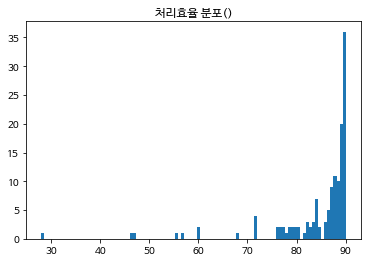

In [ ]:
a = pd.concat([test_high_y,train_high_y])
b = pd.concat([test_low_y,train_low_y])
display(b)
npYtest = np.array(b)
plt.hist(npYtest, bins = 100)
plt.title("처리효율 분포()")
plt.show()

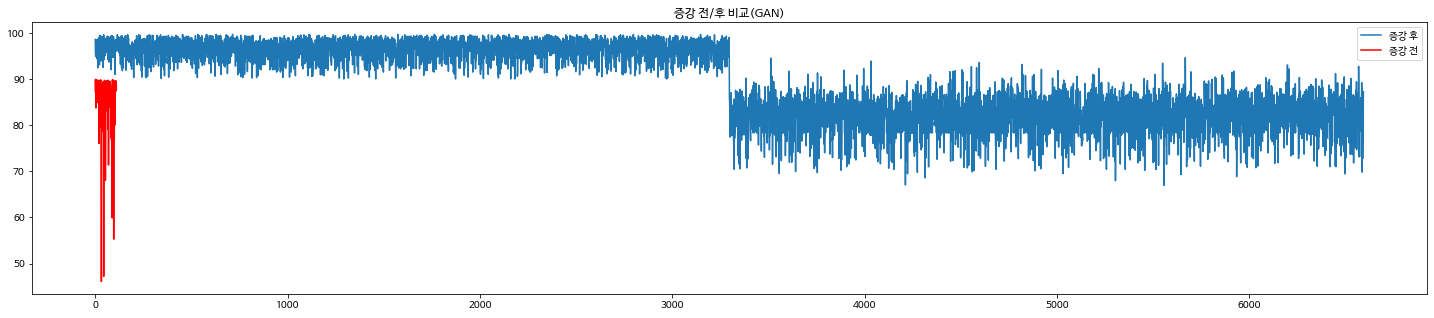

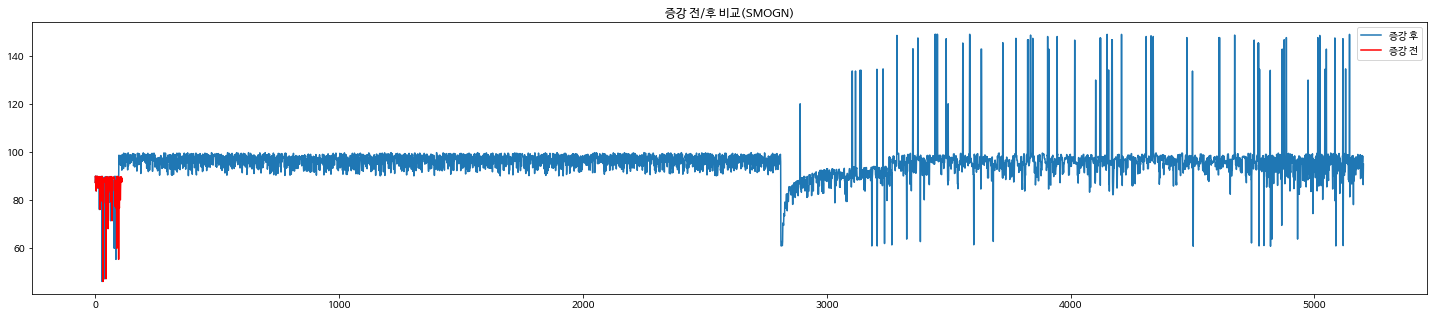

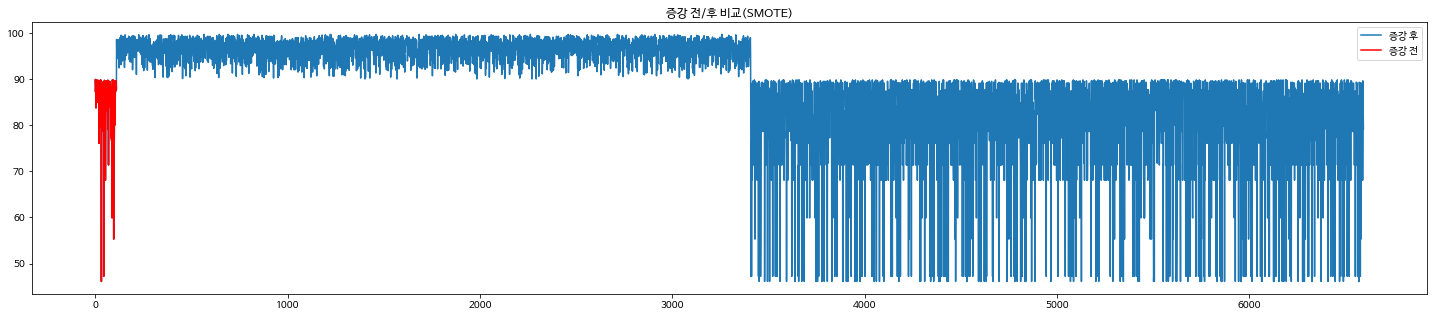

In [ ]:
#증강 전후
nptest_y = np.array(gan_y)
plt.figure(figsize=(25, 5)) #표 크기 지정
plt.title("증강 전/후 비교(GAN)")
plt.plot(nptest_y, label='증강 후')  #파란점, 실제값
plt.plot(train_low_y, c='r', label='증강 전')  #빨간점, 예측값
plt.legend(loc='best')  #범례(오른쪽 상단 박스)가 표시되는 위치 지정
plt.show()

nptest_y = np.array(smogn_y)
plt.figure(figsize=(25, 5)) #표 크기 지정
plt.title("증강 전/후 비교(SMOGN)")
plt.plot(nptest_y, label='증강 후')  #파란점, 실제값
plt.plot(train_low_y, c='r', label='증강 전')  #빨간점, 예측값
plt.legend(loc='best')  #범례(오른쪽 상단 박스)가 표시되는 위치 지정
plt.show()

nptest_y = np.array(smote_y)
plt.figure(figsize=(25, 5)) #표 크기 지정
plt.title("증강 전/후 비교(SMOTE)")
plt.plot(nptest_y, label='증강 후')  #파란점, 실제값
plt.plot(train_low_y, c='r', label='증강 전')  #빨간점, 예측값
plt.legend(loc='best')  #범례(오른쪽 상단 박스)가 표시되는 위치 지정
plt.show()


In [ ]:
#90이하/초과 test 데이터
Y_test_low_idx= Y_test.index[Y_test["처리효율"]<=90].tolist()
all = Y_test.index.tolist()
c = set(all)-set(Y_test_low_idx)
Y_test_low = Y_test.loc[c,:]
len(Y_test_low)

827

In [ ]:
Y_test_low_idx= Y_test.index[Y_test["처리효율"]<=90].tolist()
all = Y_test.index.tolist()
c = set(all)-set(Y_test_low_idx)
Y_test_low = Y_test.iloc[Y_test_low_idx,:]
X_test_low = X_test.iloc[Y_test_low_idx,:]

Y_test_high = Y_test.loc[c,:]
X_test_high = X_test.loc[c,:]

X_test_low.to_csv("/content/drive/MyDrive/기계학습팀플/코드/data/X_test_low(기존모델에test).csv", encoding = 'utf-8-sig', index = False)
Y_test_low.to_csv("/content/drive/MyDrive/기계학습팀플/코드/data/Y_test_low(기존모델에test).csv", encoding = 'utf-8-sig', index = False)
X_test_high.to_csv("/content/drive/MyDrive/기계학습팀플/코드/data/X_test_high(기존모델에test).csv", encoding = 'utf-8-sig', index = False)
Y_test_high.to_csv("/content/drive/MyDrive/기계학습팀플/코드/data/Y_test_high(기존모델에test).csv", encoding = 'utf-8-sig', index = False)

## 기본 데이터(X_train,Y_train/X_test,Y_test)

In [ ]:
#하이퍼파라미터
params = {
    'n_estimators':[10,50 ,100],#결정트리 개수
    'max_depth' : [6,8,10,12], #트리 최대 깊이
    'min_samples_leaf' : [8, 12, 16], #리프노트가 되기위해 필요한 최소한 샘플 데이터 수 
    'min_samples_split' :[8, 12, 16] #노드 분할을 위한 최소한의 샘플 수
}
rf_run = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_run, param_grid=params, cv=5, n_jobs=-1)
grid_cv.fit(X_train, Y_train)


print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


최적 하이퍼 파라미터: {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 12, 'n_estimators': 100}
최적 예측 정확도: 0.6618


In [ ]:
# 랜덤포레스트 득점모델 학습
rf_run = RandomForestRegressor(random_state=0, 
                               max_depth=12, 
                               min_samples_leaf=8, 
                               min_samples_split=12,
                               n_estimators=100)
rf_run.fit(X_train, Y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(max_depth=12, min_samples_leaf=8, min_samples_split=12,
                      random_state=0)

train RMSE:1.712873439241956
train MSE:2.933935418860567
train R2: 0.7839

validation RMSE:1.931758076864312
validation MSE:3.731689267530505
validation R2: 0.7178

test RMSE:1.3279520035599182
test MSE:1.7634565237588011
test R2: 0.7856



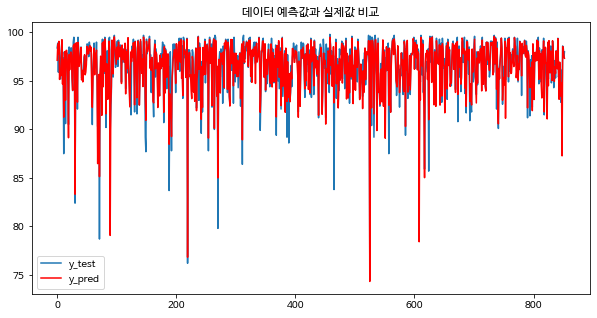

In [ ]:

# train 
train_predict = rf_run.predict(X_train)
print("train RMSE:{}".format(math.sqrt(mean_squared_error(train_predict, Y_train))) )
print("train MSE:{}".format(mean_squared_error(train_predict, Y_train)))
print('train R2: {:.4f}\n'.format(r2_score(Y_train,train_predict)))

 
# validation
valid_predict = rf_run.predict(X_cv)
print("validation RMSE:{}".format(math.sqrt(mean_squared_error(valid_predict, Y_cv))) )
print("validation MSE:{}".format(mean_squared_error(valid_predict, Y_cv)))
print('validation R2: {:.4f}\n'.format(r2_score(Y_cv,valid_predict)))

# test 
rf_run_predict = rf_run.predict(X_test)
print("test RMSE:{}".format(math.sqrt(mean_squared_error(rf_run_predict, Y_test))) )
print("test MSE:{}".format(mean_squared_error(rf_run_predict, Y_test)))
print('test R2: {:.4f}\n'.format(r2_score(Y_test,rf_run_predict)))

#예측값과 실제값의 분포
nptest_y = np.array(Y_test)
plt.figure(figsize=(10, 5)) #표 크기 지정
plt.title("데이터 예측값과 실제값 비교")
plt.plot(nptest_y, label='y_test')  #파란점, 실제값
plt.plot(rf_run_predict, c='r', label='y_pred')  #빨간점, 예측값
plt.legend(loc='best')  #범례(오른쪽 상단 박스)가 표시되는 위치 지정
plt.show()

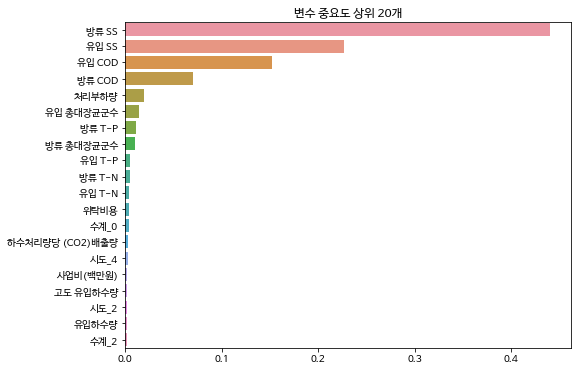

In [ ]:
#변수 중요도
ftr_importances_values = rf_run.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
plt.title("변수 중요도 상위 20개")
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()


## 기본 데이터의 90이하/초과 test

test RMSE:4.548624900497036
test MSE:20.689988485421676
test R2: -0.2402



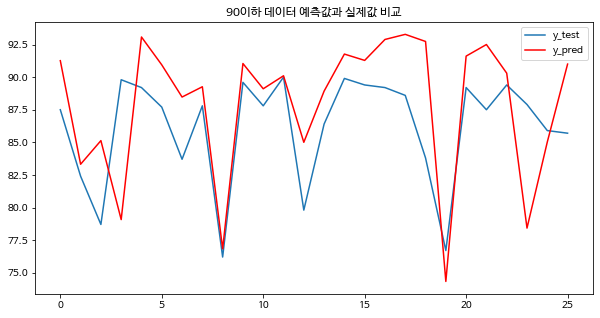

In [ ]:
#90이하
# test 
rf_run_predict = rf_run.predict(X_test_low)
print("test RMSE:{}".format(math.sqrt(mean_squared_error(rf_run_predict, Y_test_low))) )
print("test MSE:{}".format(mean_squared_error(rf_run_predict, Y_test_low)))
print('test R2: {:.4f}\n'.format(r2_score(Y_test_low,rf_run_predict)))

#예측값과 실제값의 분포
nptest_y = np.array(Y_test_low)
plt.figure(figsize=(10, 5)) #표 크기 지정
plt.title("90이하 데이터 예측값과 실제값 비교")
plt.plot(nptest_y, label='y_test')  #파란점, 실제값
plt.plot(rf_run_predict, c='r', label='y_pred')  #빨간점, 예측값
plt.legend(loc='best')  #범례(오른쪽 상단 박스)가 표시되는 위치 지정
plt.show()

test RMSE:1.080937786536257
test MSE:1.168426498361903
test R2: 0.7380



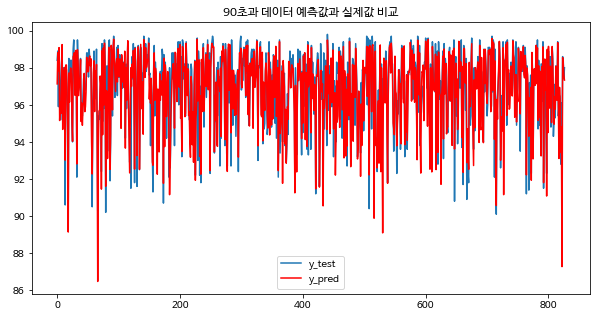

In [ ]:
#90초과
# test 
rf_run_predict = rf_run.predict(X_test_high)
print("test RMSE:{}".format(math.sqrt(mean_squared_error(rf_run_predict, Y_test_high))) )
print("test MSE:{}".format(mean_squared_error(rf_run_predict, Y_test_high)))
print('test R2: {:.4f}\n'.format(r2_score(Y_test_high,rf_run_predict)))

#예측값과 실제값의 분포
nptest_y = np.array(Y_test_high)
plt.figure(figsize=(10, 5)) #표 크기 지정
plt.title("90초과 데이터 예측값과 실제값 비교")
plt.plot(nptest_y, label='y_test')  #파란점, 실제값
plt.plot(rf_run_predict, c='r', label='y_pred')  #빨간점, 예측값
plt.legend(loc='best')  #범례(오른쪽 상단 박스)가 표시되는 위치 지정
plt.show()

## 증강 데이터(gan_x, gan_y/test_x(low+high),test_y(low+high))

In [ ]:
#하이퍼파라미터
params = {
    'n_estimators':[10,50 ,100],#결정트리 개수
    'max_depth' : [6,8,10,12], #트리 최대 깊이
    'min_samples_leaf' : [8, 12, 16], #리프노트가 되기위해 필요한 최소한 샘플 데이터 수 
    'min_samples_split' :[8, 12, 16] #노드 분할을 위한 최소한의 샘플 수
}
rf_run = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_run, param_grid=params, cv=5, n_jobs=-1)
grid_cv.fit(gan_x, gan_y)


print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 12, 'n_estimators': 100}
최적 예측 정확도: 0.8962


In [ ]:
# 랜덤포레스트 득점모델 학습
rf_run = RandomForestRegressor(random_state=0, 
                               max_depth=12, 
                               min_samples_leaf=8, 
                               min_samples_split=12,
                               n_estimators=100)
rf_run.fit(gan_x, gan_y)


RandomForestRegressor(max_depth=12, min_samples_leaf=8, min_samples_split=12,
                      random_state=0)

train RMSE:0.58522322729043
train MSE:0.34248622576022625
train R2: 0.9947

test RMSE:3.3826660573166363
test MSE:11.442429655322076
test R2: 0.3496



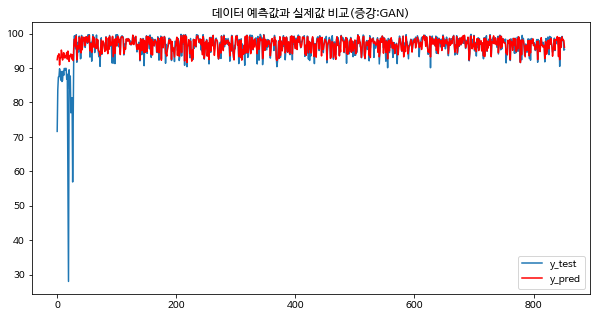

In [ ]:
# train
train_predict = rf_run.predict(gan_x)
print("train RMSE:{}".format(math.sqrt(mean_squared_error(train_predict, gan_y))) )
print("train MSE:{}".format(mean_squared_error(train_predict, gan_y)))
print('train R2: {:.4f}\n'.format(r2_score(gan_y,train_predict)))

 
# test
rf_run_predict = rf_run.predict(test_x)
print("test RMSE:{}".format(math.sqrt(mean_squared_error(rf_run_predict, test_y))) )
print("test MSE:{}".format(mean_squared_error(rf_run_predict, test_y)))
print('test R2: {:.4f}\n'.format(r2_score(test_y,rf_run_predict)))

#예측값과 실제값의 분포
nptest_y = np.array(test_y)
plt.figure(figsize=(10, 5)) #표 크기 지정
plt.title("데이터 예측값과 실제값 비교(증강:GAN)")
plt.plot(nptest_y, label='y_test')  #파란점, 실제값
plt.plot(rf_run_predict, c='r', label='y_pred')  #빨간점, 예측값
plt.legend(loc='best')  #범례(오른쪽 상단 박스)가 표시되는 위치 지정
plt.show()

## 증강 데이터(somgn_x, smogn_y/test_x(low+high),test_y(low+high))

In [ ]:
#하이퍼파라미터
params = {
    'n_estimators':[10,50 ,100],#결정트리 개수
    'max_depth' : [6,8,10,12], #트리 최대 깊이
    'min_samples_leaf' : [8, 12, 16], #리프노트가 되기위해 필요한 최소한 샘플 데이터 수 
    'min_samples_split' :[8, 12, 16] #노드 분할을 위한 최소한의 샘플 수
}
rf_run = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_run, param_grid=params, cv=5, n_jobs=-1)
grid_cv.fit(smogn_x, smogn_y)


print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 16, 'n_estimators': 50}
최적 예측 정확도: 0.3880


In [ ]:
# 랜덤포레스트 득점모델 학습
rf_run = RandomForestRegressor(random_state=0, 
                               max_depth=6, 
                               min_samples_leaf=8, 
                               min_samples_split=16,
                               n_estimators=50)
rf_run.fit(smogn_x, smogn_y)


RandomForestRegressor(max_depth=6, min_samples_leaf=8, min_samples_split=16,
                      n_estimators=50, random_state=0)

train RMSE:5.520665742986901
train MSE:30.47775024578911
train R2: 0.4310

test RMSE:2.901436419426977
test MSE:8.418333295977236
test R2: 0.5215



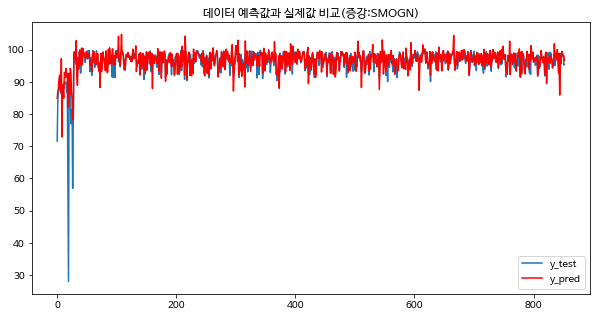

In [ ]:
# train 
train_predict = rf_run.predict(smogn_x)
print("train RMSE:{}".format(math.sqrt(mean_squared_error(train_predict, smogn_y))) )
print("train MSE:{}".format(mean_squared_error(train_predict, smogn_y)))
print('train R2: {:.4f}\n'.format(r2_score(smogn_y,train_predict)))

 
# test 
rf_run_predict = rf_run.predict(test_x)
print("test RMSE:{}".format(math.sqrt(mean_squared_error(rf_run_predict, test_y))) )
print("test MSE:{}".format(mean_squared_error(rf_run_predict, test_y)))
print('test R2: {:.4f}\n'.format(r2_score(test_y,rf_run_predict)))

#예측값과 실제값의 분포
nptest_y = np.array(test_y)
plt.figure(figsize=(10, 5)) #표 크기 지정
plt.title("데이터 예측값과 실제값 비교(증강:SMOGN)")
plt.plot(nptest_y, label='y_test')  #파란점, 실제값
plt.plot(rf_run_predict, c='r', label='y_pred')  #빨간점, 예측값
plt.legend(loc='best')  #범례(오른쪽 상단 박스)가 표시되는 위치 지정
plt.show()

## 증강 데이터(somte_x, smote_y/test_x(low+high),test_y(low+high))

In [ ]:
#하이퍼파라미터
params = {
    'n_estimators':[10,50 ,100],#결정트리 개수
    'max_depth' : [6,8,10,12], #트리 최대 깊이
    'min_samples_leaf' : [8, 12, 16], #리프노트가 되기위해 필요한 최소한 샘플 데이터 수 
    'min_samples_split' :[8, 12, 16] #노드 분할을 위한 최소한의 샘플 수
}
rf_run = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_run, param_grid=params, cv=5, n_jobs=-1)
grid_cv.fit(smote_x, smote_y)


print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 16, 'n_estimators': 50}
최적 예측 정확도: 0.6567


In [ ]:
# 랜덤포레스트 득점모델 학습
rf_run = RandomForestRegressor(random_state=0, 
                               max_depth=12, 
                               min_samples_leaf=8, 
                               min_samples_split=16,
                               n_estimators=50)
rf_run.fit(smote_x, smote_y)


RandomForestRegressor(max_depth=12, min_samples_leaf=8, min_samples_split=16,
                      n_estimators=50, random_state=0)

train RMSE:1.3718819481682485
train MSE:1.882060079709909
train R2: 0.9862

test RMSE:2.920643640887899
test MSE:8.530159277058923
test R2: 0.5151



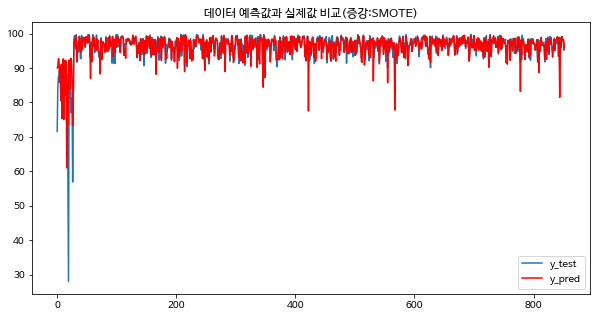

In [ ]:
# train 
train_predict = rf_run.predict(smote_x)
print("train RMSE:{}".format(math.sqrt(mean_squared_error(train_predict, smote_y))) )
print("train MSE:{}".format(mean_squared_error(train_predict, smote_y)))
print('train R2: {:.4f}\n'.format(r2_score(smote_y,train_predict)))

 
# test 
rf_run_predict = rf_run.predict(test_x)
print("test RMSE:{}".format(math.sqrt(mean_squared_error(rf_run_predict, test_y))) )
print("test MSE:{}".format(mean_squared_error(rf_run_predict, test_y)))
print('test R2: {:.4f}\n'.format(r2_score(test_y,rf_run_predict)))

#예측값과 실제값의 분포
nptest_y = np.array(test_y)
plt.figure(figsize=(10, 5)) #표 크기 지정
plt.title("데이터 예측값과 실제값 비교(증강:SMOTE)")
plt.plot(nptest_y, label='y_test')  #파란점, 실제값
plt.plot(rf_run_predict, c='r', label='y_pred')  #빨간점, 예측값
plt.legend(loc='best')  #범례(오른쪽 상단 박스)가 표시되는 위치 지정
plt.show()